# Rayleigh Scattering

**Scott Prahl**

**March 2025**
    

In [1]:
%config InlineBackend.figure_format = 'retina'

import os
import sys
import numpy as np
import matplotlib.pyplot as plt

if sys.platform == "emscripten":
    import piplite

    await piplite.install("miepython", deps=False)
    os.environ["MIEPYTHON_USE_JIT"] = "0"  # jupyterlite cannot use numba

import miepython as mie
from miepython import rayleigh as ray

## Goals for this notebook:

* Plot Rayleigh scattering
* Compare total scattering between Rayleigh and Mie
* Compare scattering functions for unpolarized light
* Compare polarized results.

## Rayleigh Scattering Functions

Mie scattering describes the special case of the interaction of light passing through a non-absorbing medium with a single embedded spherical object.  The sphere itself can be non-absorbing, moderately absorbing, or perfectly absorbing.

Rayleigh scattering is a simple closed-form solution for the scattering from small spheres.

## The Rayleigh scattering phase function


Rayleigh scattering describes the elastic scattering of light by spheres that are much smaller than the wavelength of light. The intensity $I$ of the scattered radiation is given by

$$
I=I_{0}\left(\frac {1+\cos ^{2}\theta }{2R^{2}}\right)
       \left(\frac {2\pi }{\lambda }\right)^{4}
       \left(\frac {n^{2}-1}{n^{2}+2}\right)^{2}
       \left(\frac {d}{2}\right)^{6}
$$

where $I_0$ is the light intensity before the interaction with the particle, $R$ is the distance between the particle and the observer, $\theta$ is the scattering angle, $n$ is the refractive index of the particle, and $d$ is the diameter of the particle.

$$
x = \frac{\pi d}{\lambda} \qquad \rho=\frac{R}{\lambda}
$$

and thus

$$
I=\frac{I_0}{8\pi^2\rho^2} 
       \left(\frac{n^2-1}{n^2+2}\right)^{2}
       x^{4}(1+\cos^2\theta)
$$



## Compare Efficiencies with Mie Code

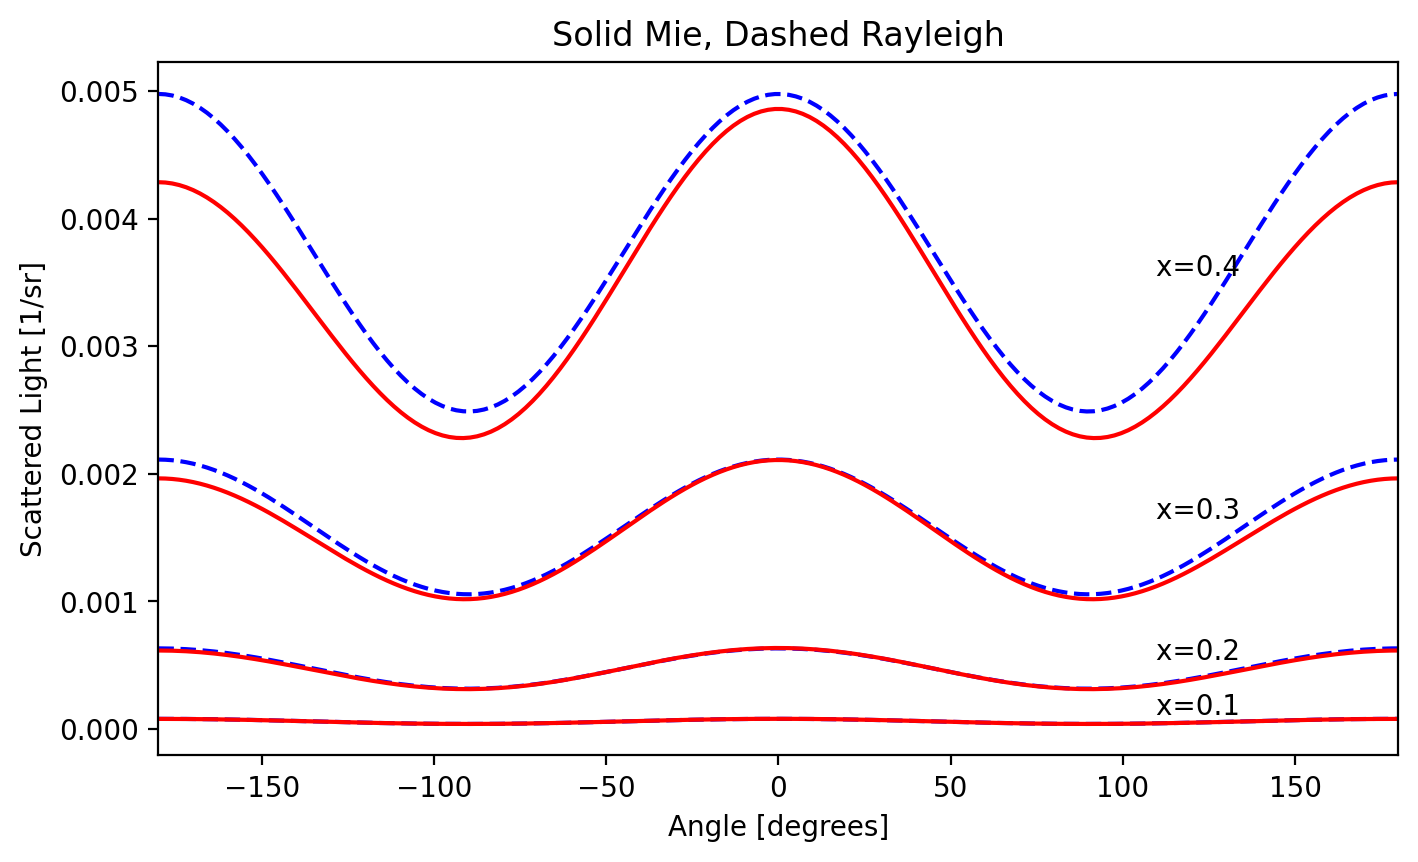

In [2]:
for x in [0.1, 0.2, 0.3, 0.4]:

    m = 1.5 - 1j
    theta = np.linspace(-180, 180, 180)
    mu = np.cos(theta * np.pi / 180)

    rscat = ray.i_unpolarized(m, x, mu)
    mscat = mie.i_unpolarized(m, x, mu)
    plt.plot(theta, rscat, "--b")
    plt.plot(theta, mscat, "r")
    plt.annotate("x=%.1f   " % x, (theta[-20], mscat[-20]), ha="right", va="bottom")

plt.xlim(-180, 180)
plt.xlabel("Angle [degrees]")
plt.ylabel("Scattered Light [1/sr]")
plt.title("Solid Mie, Dashed Rayleigh")
plt.show()

## Polar plots for fun

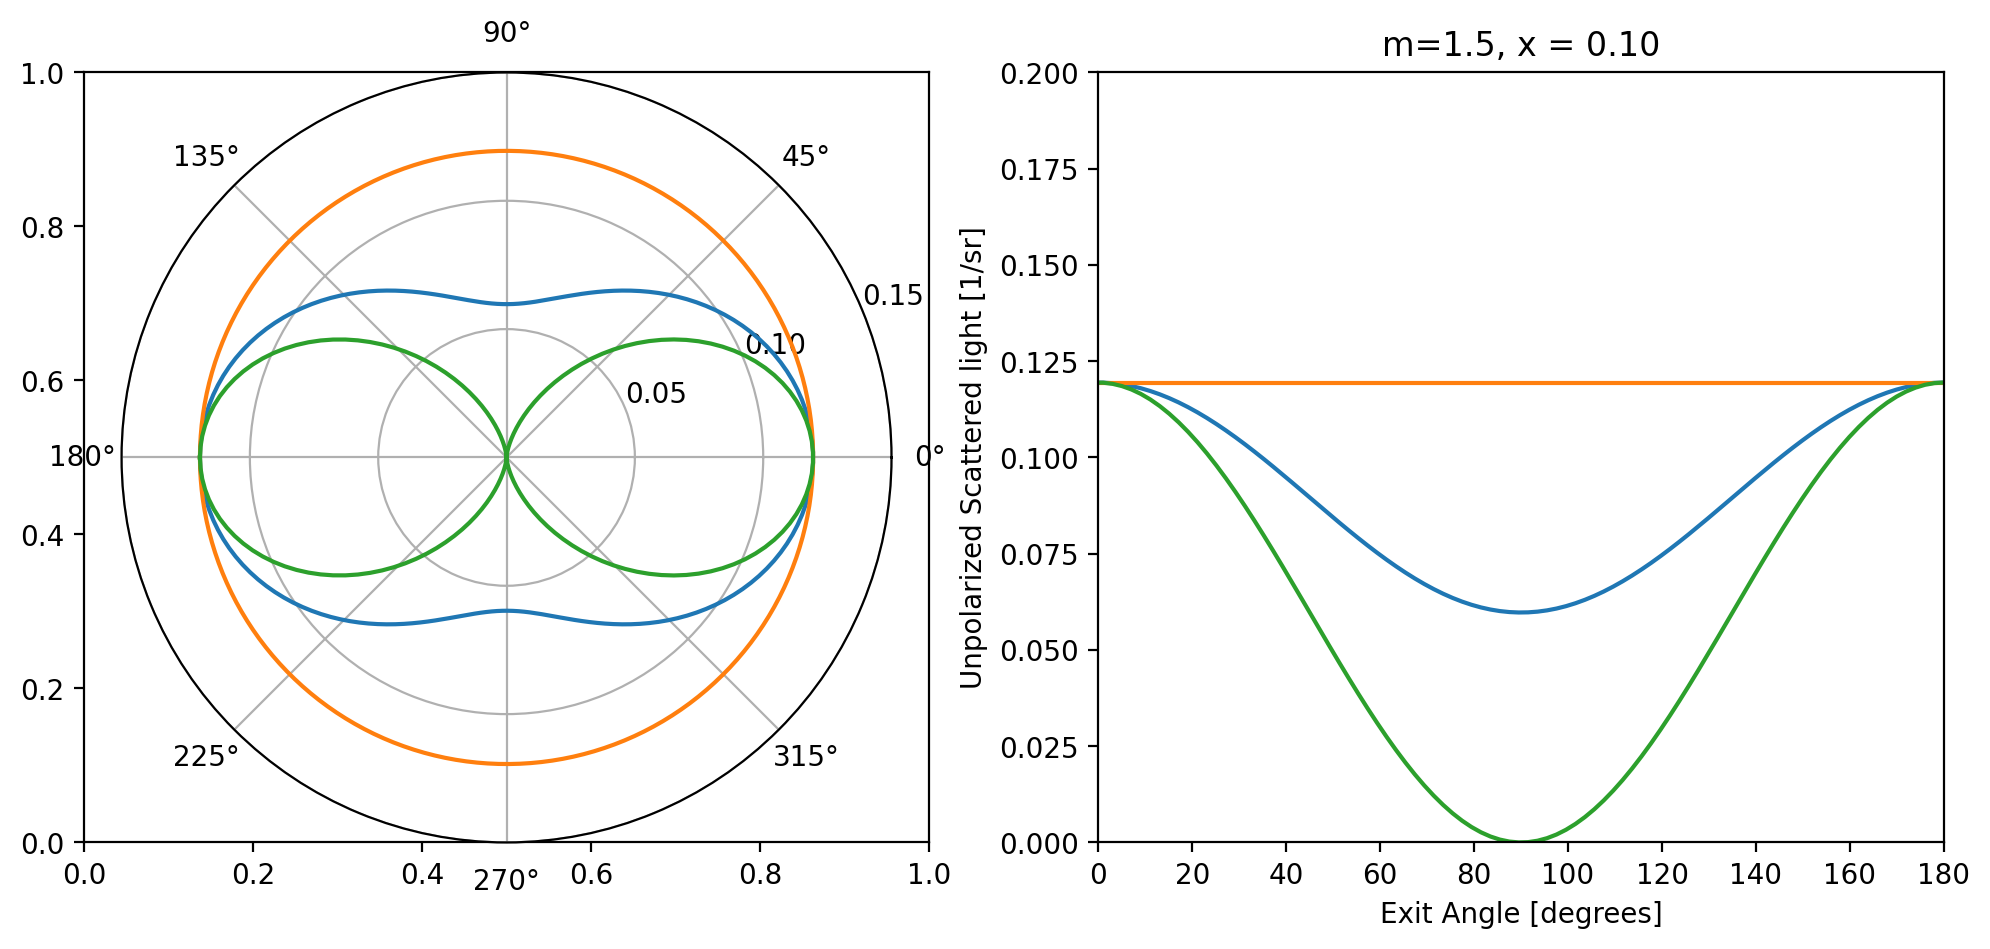

In [3]:
m = 1.5
x = 0.1
theta = np.linspace(-180, 180, 180)
mu = np.cos(theta / 180 * np.pi)
unp = ray.i_unpolarized(m, x, mu)
s1, s2 = ray.S1_S2(m, x, mu)
par = abs(s1) ** 2
per = abs(s2) ** 2

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax = plt.subplot(121, projection="polar")
ax.plot(theta / 180 * np.pi, unp)
ax.plot(theta / 180 * np.pi, par)
ax.plot(theta / 180 * np.pi, per)

ax.set_rticks([0.05, 0.1, 0.15])

plt.subplot(122)
# plt.plot(theta,scat)
plt.plot(theta, unp)
plt.plot(theta, par)
plt.plot(theta, per)

plt.xlabel("Exit Angle [degrees]")
plt.ylabel("Unpolarized Scattered light [1/sr]")
plt.title("m=1.5, x = %.2f" % x)

plt.ylim(0.00, 0.2)
plt.xlim(0, 180)

plt.show()

## Compare Rayleigh and Mie efficiencies

In [4]:
m = 1.5
x = 0.1
qext, qsca, qback, g = mie.efficiencies_mx(m, x)
rext, rsca, rback, rg = ray.efficiencies_mx(m, x)

print("Qext        Qsca        Qback       g")
print("%.5e %.5e %.5e %.5f Mie" % (qext, qsca, qback, g))
print("%.5e %.5e %.5e %.5f Rayleigh" % (rext, rsca, rback, rg))

Qext        Qsca        Qback       g
2.30841e-05 2.30841e-05 3.44629e-05 0.00198 Mie
2.30681e-05 2.30681e-05 3.46021e-05 0.00000 Rayleigh


## Compare scattering amplitudes S1 and S2

In [5]:
m = 1.5
x = 0.1
theta = np.linspace(-180, 180, 19)
mu = np.cos(np.deg2rad(theta))

s1, s2 = mie.S1_S2(m, x, mu)
rs1, rs2 = ray.S1_S2(m, x, mu)

# the real part of the Rayleigh scattering is always zero

print("          Mie       Rayleigh | Mie      Rayleigh")
print("  angle | S1.imag    S1.imag | S2.imag  S2.imag")
print("------------------------------------------------")
for i, angle in enumerate(theta):
    print("%7.2f | %8.5f  %8.5f | %8.5f %8.5f " % (angle, s1[i].imag, rs1[i].imag, s2[i].imag, rs2[i].imag))

          Mie       Rayleigh | Mie      Rayleigh
  angle | S1.imag    S1.imag | S2.imag  S2.imag
------------------------------------------------
-180.00 |  0.34468   0.34562 | -0.34468 -0.34562 
-160.00 |  0.34473   0.34562 | -0.32392 -0.32477 
-140.00 |  0.34487   0.34562 | -0.26412 -0.26476 
-120.00 |  0.34509   0.34562 | -0.17242 -0.17281 
-100.00 |  0.34535   0.34562 | -0.05981 -0.06002 
 -80.00 |  0.34563   0.34562 |  0.06018  0.06002 
 -60.00 |  0.34590   0.34562 |  0.17307  0.17281 
 -40.00 |  0.34612   0.34562 |  0.26521  0.26476 
 -20.00 |  0.34626   0.34562 |  0.32540  0.32477 
   0.00 |  0.34631   0.34562 |  0.34631  0.34562 
  20.00 |  0.34626   0.34562 |  0.32540  0.32477 
  40.00 |  0.34612   0.34562 |  0.26521  0.26476 
  60.00 |  0.34590   0.34562 |  0.17307  0.17281 
  80.00 |  0.34563   0.34562 |  0.06018  0.06002 
 100.00 |  0.34535   0.34562 | -0.05981 -0.06002 
 120.00 |  0.34509   0.34562 | -0.17242 -0.17281 
 140.00 |  0.34487   0.34562 | -0.26412 -0.26476 
 160